In [94]:
from PIL import Image
img = Image.open('train2014/COCO_train2014_000000012614.jpg')

samples = json.load(open("samples_reindex.json", 'r'))

samples['1']['annotation']['area']
img.heightimg.width


(640, 640)

In [96]:
import numpy as np
import json
import pandas as pd
from pycocotools import mask
from PIL import Image
import os
import pandas as pd

df = pd.DataFrame(columns=[
    'subject', 'image_id', 'right', 'picture_t', 'sent_t', 'exist_object',
    'age', 'sex', 'object_num', 'object_person_num','sent_len','target Area Proportion'
])
df


def mean_and_variance():
    samples = json.load(open("samples_reindex.json", 'r'))
    xy = pd.read_csv("xy.csv", index_col=0)
    react_t = pd.read_csv("t.csv", index_col=0)
    sent_t_df = pd.read_csv('sent.csv', index_col=0)
    info = pd.read_csv("info.csv", index_col=0)
    # print(xy.shape)
    person_accuracy = []

    # means, stds, maxs, mins = [], [], [], []

    for i in range(xy.shape[0]):
        # 前8个是旧数据
        if i <= 8:
            continue

        right_count = 0
        total_count = 0
        for j in range(xy.shape[1]):
            x_y = xy.iloc[i, j]
            t = float(react_t.iloc[i, j])

            sent_t = float(sent_t_df.iloc[i, j])

            # 空值跳过
            # print(pd.isna(x_y))
            if pd.isna(x_y) or (t >= 10000) or (sent_t >= 10000):
                continue

            x, y = x_y.split('_')
            x, y = float(x), float(y)

            if (t > 10000) or (samples[str(j + 1)]['ann_id'][0] == -1 and x !=
                               -1) or (samples[str(j + 1)]['ann_id'][0] != -1
                                       and x == -1):
                # 三个括号分别代表 1.超时 2.不存在 却点击了图片 # 存在却点击不存在
                right = False
            elif (samples[str(j + 1)]['ann_id'][0] == -1
                  and x == -1):  # 图片不存在 点击 不存在
                right = True
            else:  # 图片存在，用户也点击了
                right = is_click_right(x, y, samples[str(j + 1)])

            # print(f"correct? {right}")
            right_count += 1 if right else 0
            total_count += 1

            age = int(info.loc[i, 'age'])
            sex = info.loc[i, 'sex']

            with open(
                    f"detect/labels/{ samples[str(j + 1)]['file_name']}"[:-3] +
                    'txt') as f:
                lines = f.readlines()
                object_num = len(lines)
                object_person_num = 0
                for line in lines:
                    if line[0] == '0':
                        object_person_num += 1

            exist = samples[str(j + 1)]['ann_id'][0] != -1
            img = Image.open(f'train2014/{ samples[str(j + 1)]["file_name"]}')
            
            h,w = img.height,img.width
            
            area_p = samples[str(j + 1)]['annotation']['area'] / (h*w) if exist else None
            
            record = {
                'subject': i,
                'image_id': j,
                'right': right,
                'picture_t': t,
                'sent_t': sent_t,
                'exist_object': exist,
                'age': age,
                'sex': sex,
                'object_num': object_num,
                'object_person_num':object_person_num,
                'sent_len':len(samples[str(j + 1)]['sentences'][0]['translation']),
                'target Area Proportion': area_p
            }
            df.loc[len(df)] = list(record.values())

        person_accuracy.append(round(right_count / total_count, 4))

    max_num = np.max(person_accuracy)
    min_num = np.min(person_accuracy)
    mean = np.mean(person_accuracy)
    variance = np.var(person_accuracy)

    print(f"最大值：{max_num}")
    print(f"最小值：{min_num}")
    print(f"均值: {mean}")
    print(f"方差: {variance}")


def is_click_right(x, y, ref):
    """
    xy: 被试点击的相对坐标
    对应图片的json文件记录,ref = samples[str(n)]
    """
    image_dir = "train2014"
    file_name = ref['file_name']
    i = Image.open(os.path.join(image_dir, file_name))
    w = i.width
    h = i.height

    ann = ref['annotation']
    if type(ann['segmentation'][0]) == list:  # polygon
        rle = mask.frPyObjects(ann['segmentation'], h, w)
    else:
        rle = ann['segmentation']

    m = mask.decode(rle)
    m = np.sum(m, axis=2)

    x = x * w
    y = y * h

    if m[int(y), int(x)] == 0:
        return False
    return True


if __name__ == '__main__':
    mean_and_variance()


最大值：1.0
最小值：0.6
均值: 0.8847055555555555
方差: 0.006406299413580247


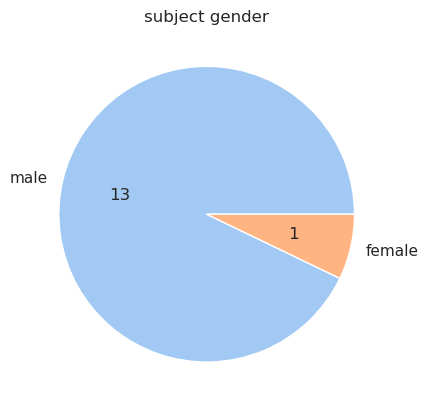

In [199]:

from datetime import datetime
perids = []
info = pd.read_csv("info.csv", index_col=0)
info = info[9:]

for time in info['time']:
    time_str = time

    # 使用datetime.strptime来解析时间字符串
    time_obj = datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")

    # 获取小时
    hour = time_obj.hour

    # 判断时间
    if 0 <= hour < 12:
        period = "morning"
    elif 12 <= hour < 18:
        period = "afternoon"
    else:
        period = "night"

    # 打印结果
    perids.append(period)
perids


import matplotlib.pyplot as plt




# 计算每种元素的数量
apple_count = perids.count('afternoon')
banana_count = perids.count('night')

# 计算总元素数量
total_count = len(perids)

# 计算比例
apple_percentage = (apple_count / total_count) * 100
banana_percentage = (banana_count / total_count) * 100

data_list= [13, 1]


labels= ['male','female']


# 绘制饼图
plt.pie(data_list, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(data_list) / 100))

# 显示图表


plt.title('subject gender')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

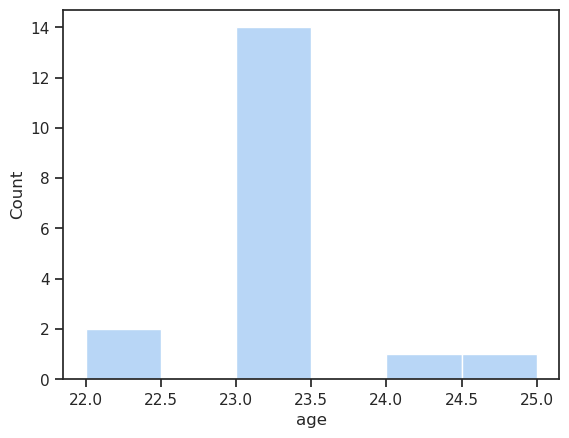

In [195]:
sns.histplot(info['age')

In [186]:
for info[time]

0.639137490706142

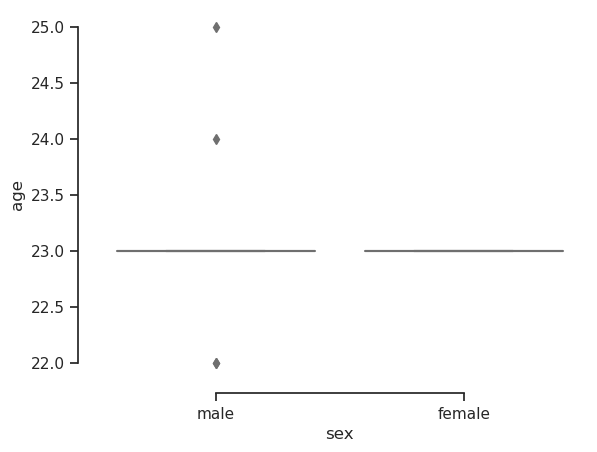

In [184]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="sex", y="age", palette=["m", "g"],
            data=info)
sns.despine(offset=10, trim=True)

Text(0.5, 0, 'subject response is correct?')

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

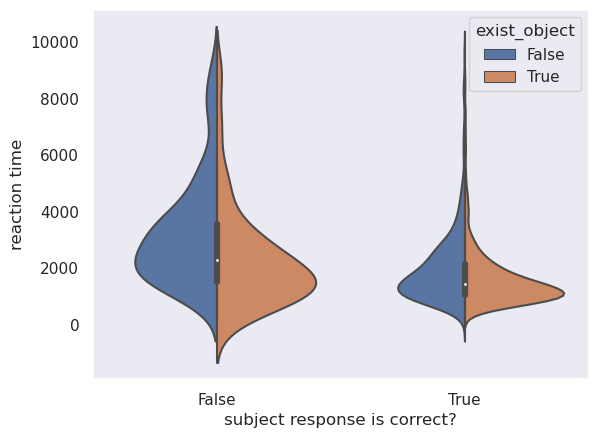

In [43]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")
plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['font.path'] = 'C:/Windows/Fonts/'

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="right", y="picture_t", hue="exist_object",
               split=True)
plt.ylabel('reaction time')
plt.xlabel("subject response is correct?")

Text(0.5, 0, 'exist object?')

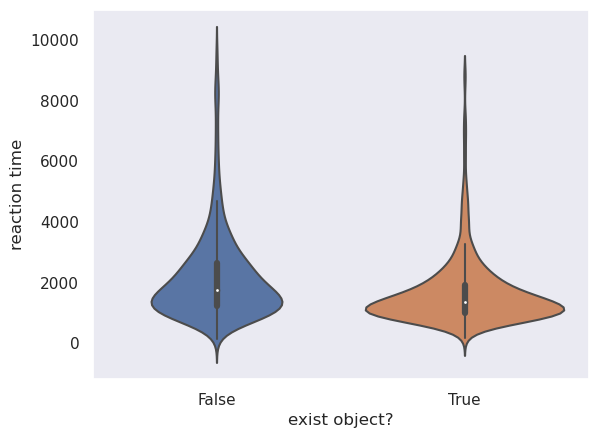

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")
#plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['font.path'] = 'C:/Windows/Fonts/'

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, y="picture_t",x="exist_object",
               split=True)
plt.ylabel('reaction time')
plt.xlabel("exist object?")

In [99]:
df.columns

Index(['subject', 'image_id', 'right', 'picture_t', 'sent_t', 'exist_object',
       'age', 'sex', 'object_num', 'object_person_num', 'sent_len',
       'target Area Proportion'],
      dtype='object')

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")
#plt.rcParams['font.family'] = 'SimHei'
# plt.rcParams['font.path'] = 'C:/Windows/Fonts/'

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df[df['target Area Proportion']!=  None], y="target Area Proportion",
               split=True)
# plt.ylabel('reaction time')
# plt.xlabel("exist object?")

TypeError: Vertical orientation requires numeric `y` variable.

<Axes: xlabel='sent_t', ylabel='picture_t'>

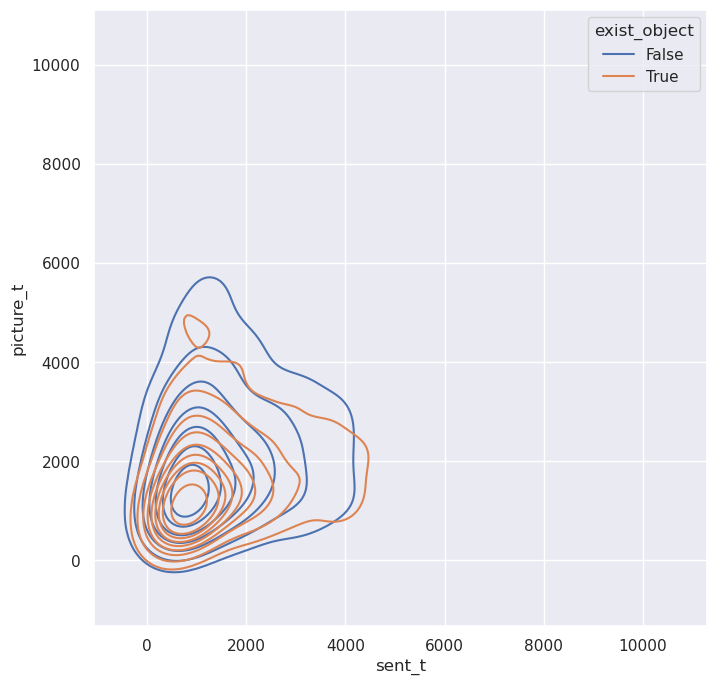

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=df,
    x="sent_t",
    y="picture_t",
    hue="exist_object",
    thresh=.1,
)

<Axes: xlabel='target Area Proportion', ylabel='picture_t'>

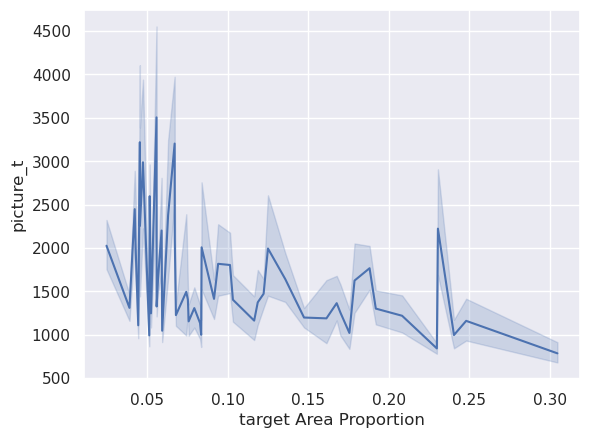

In [103]:
import seaborn as sns
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="target Area Proportion", y="picture_t",
             data=df)

array([[499016.1410697882, 526018.1530452913, 17.388085399449036,
        4.382575757575749, 4.325984298279572, 0.002273339680382783]],
      dtype=object)

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
x = df.loc[df['exist_object']==True ]
x = x[x['right']== True]
x.pop('subject')
x.pop('image_id')
x.pop('age')
x.pop("sex")
x.pop("right")
x.pop('exist_object')



model_df  = pd.DataFrame(columns=x.columns[1:])

scaler = StandardScaler()


x = x.values
X_train_scaled = (x -x.mean(0,keepdims= True))/(x.var(0,keepdims=True)**1/2)
y = X_train_scaled[:,0]
X_train_scaled= X_train_scaled[:,1:]




model = LinearRegression(fit_intercept=True)


model.fit(X_train_scaled, y)

# 进行预测（使用标准化后的测试数据）
#y_pred = model.predict(X_test_scaled)

# 输出模型参数和预测结果
print("模型的斜率：", model.coef_)

#print("预测结果：", y_pred)
model_df.loc[0]= model.coef_

模型的斜率： [ 2.11319312e-01  1.58291057e-03 -1.23660902e-04  8.90501466e-05
 -9.75695815e-06]


In [176]:
model_df

,sent_t,object_num,object_person_num,sent_len,target Area Proportion
0,-1.554385,-6.44849,NaN,-9.326311,NaN


In [178]:
model_df

,sent_t,object_num,object_person_num,sent_len,target Area Proportion
0,0.211319,0.001583,-0.000124,0.000089,-0.00001


AttributeError: 'numpy.ndarray' object has no attribute 'values'

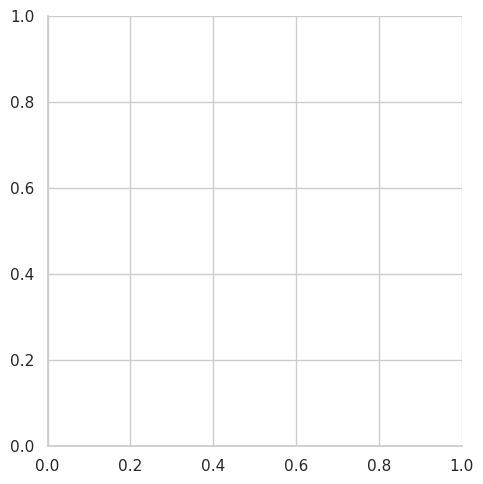

In [162]:
import seaborn as sns
sns.set_theme(style="whitegrid")




g = sns.catplot(kind="bar",
    data=model.coef_,
   
)
model_df